In [3]:
import pandas as pd

# Load the dataset
file_path = 'final_enhanced_data.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset
df.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Physical_Activity,Food_Quality,Family_History,Diabetes,Diabetes_num
0,1,193.0,77.0,49.0,3.9,19.0,female,61.0,119.0,22.5,118.0,70.0,32.0,38.0,0.84,High,Average,No,No diabetes,0.0
1,2,146.0,79.0,41.0,3.6,19.0,female,60.0,135.0,26.4,108.0,58.0,33.0,40.0,0.83,Moderate,Good,No,No diabetes,0.0
2,3,217.0,75.0,54.0,4.0,20.0,female,67.0,187.0,29.3,110.0,72.0,40.0,45.0,0.89,Moderate,Average,No,No diabetes,0.0
3,4,226.0,97.0,70.0,3.2,20.0,female,64.0,114.0,19.6,122.0,64.0,31.0,39.0,0.79,High,Poor,No,No diabetes,0.0
4,5,164.0,91.0,67.0,2.4,20.0,female,70.0,141.0,20.2,122.0,86.0,32.0,39.0,0.82,High,Average,No,No diabetes,0.0


In [10]:
import pandas as pd
import plotly.express as px

# Load your dataset
final_data = pd.read_csv('final_enhanced_data.csv')

# Calculating the percentage distribution of diabetes status
diabetes_distribution = final_data['Diabetes'].value_counts(normalize=True) * 100

# Defining custom colors
colors = ['#9bbb59', '#bf504d', '#4aacc6', '#4e81bd', '#f89645', '#8064a2']

# Creating a pie chart using Plotly with labels and values
fig = px.pie(values=diabetes_distribution, names=diabetes_distribution.index, 
             title='Diabetes Percentage Distribution', 
             color_discrete_sequence=colors[:len(diabetes_distribution)],
             labels={'index':'Diabetes Status', 'value':'Percentage'})

# Adding the percentage values to the pie chart
fig.update_traces(textinfo='label+percent')

fig.show()


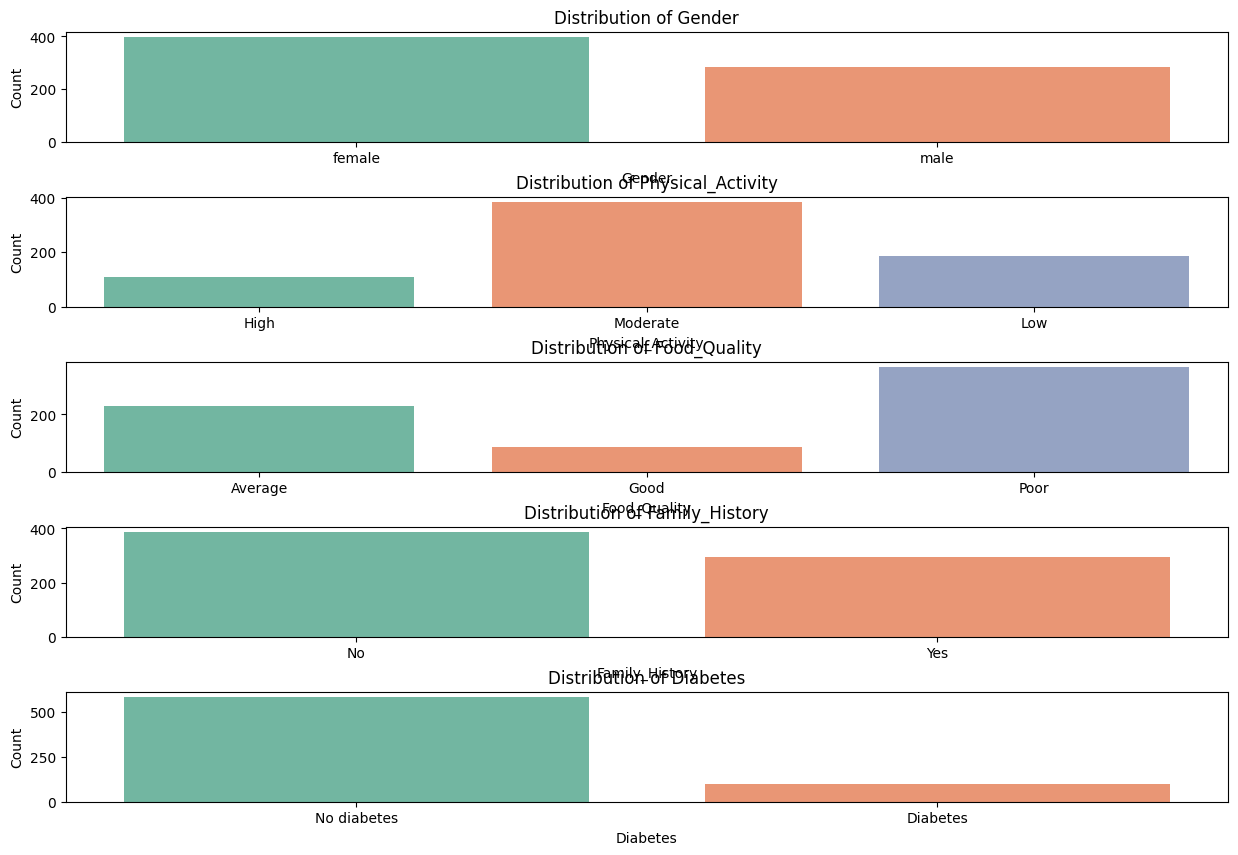

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifying the categorical variables in the dataset
categorical_columns = final_data.select_dtypes(include=['object']).columns

# Setting up the figure for plotting
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

# Looping through each categorical variable and creating a subplot for each
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(x=column, data=final_data, palette="Set2")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.show()



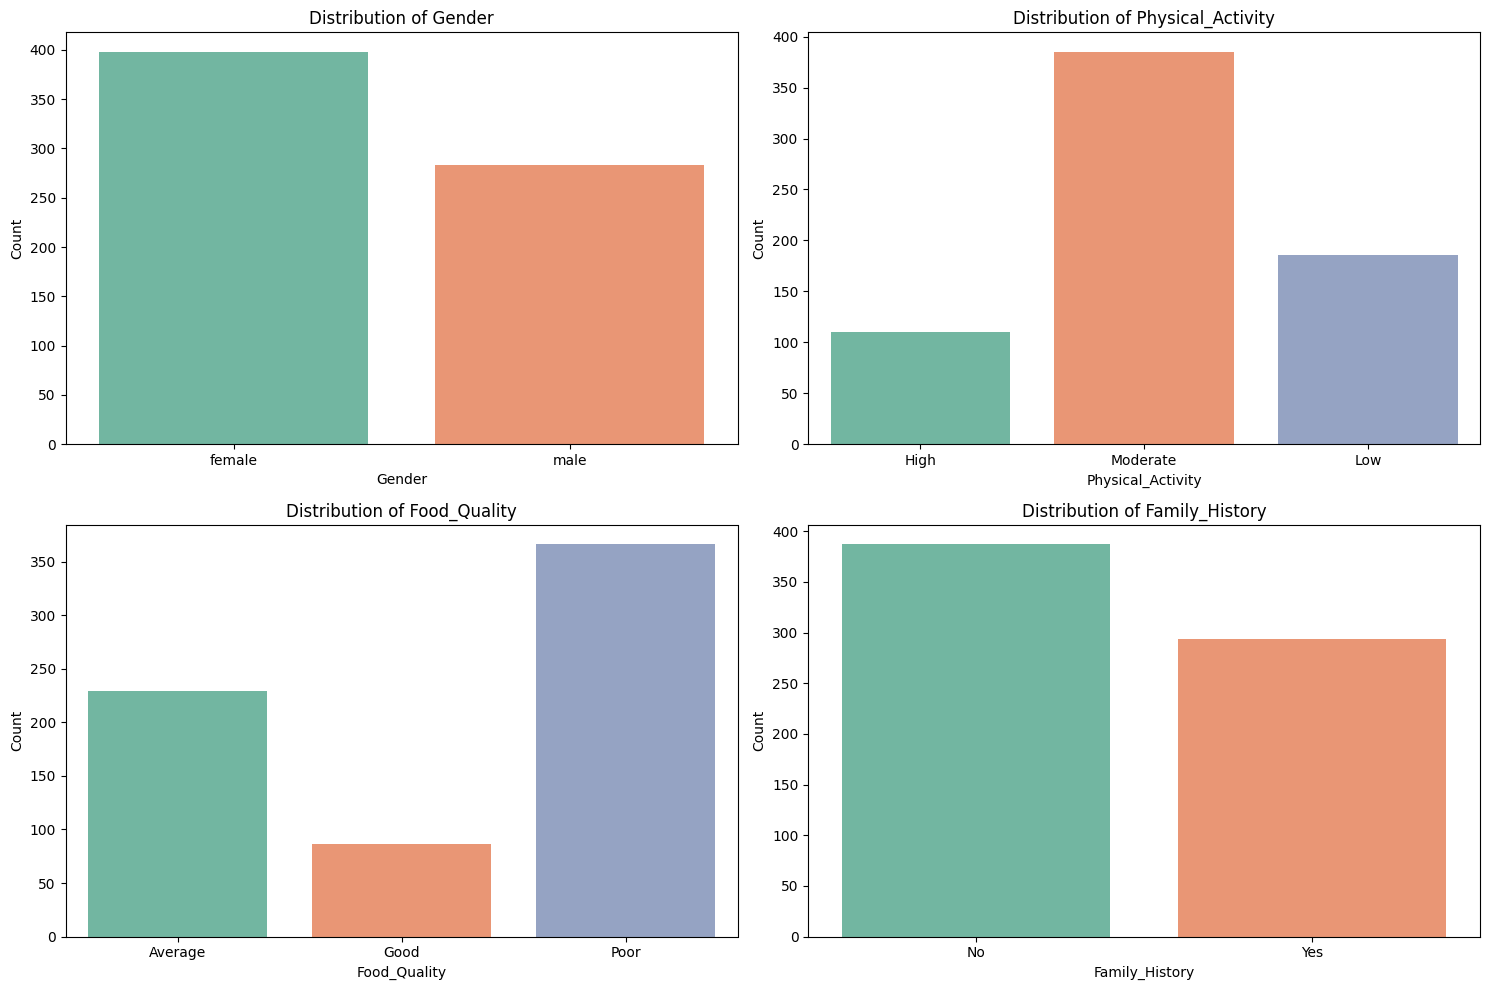

In [13]:
# Adjusting the plot to a 2x2 matrix style, excluding the distribution of 'Diabetes'

# Updating the list of categorical columns to exclude 'Diabetes'
categorical_columns = [col for col in categorical_columns if col != 'Diabetes']

# Setting up the figure for plotting in a 2x2 matrix style
plt.figure(figsize=(15, 10))

# Looping through each categorical variable and creating a subplot for each
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)  # Adjusting subplot index for a 2x2 layout
    sns.countplot(x=column, data=final_data, palette="Set2")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()  # Adjusting layout for better spacing
plt.show()


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preparing the dataset for modeling

# Recoding the 'Diabetes' column to binary (0 and 1)

# Mapping 'No diabetes' to 0 and 'Diabetes' to 1
final_data['Diabetes_recode'] = final_data['Diabetes'].map({'No diabetes': 0, 'Diabetes': 1})

# Dropping the original 'Diabetes_num' column
final_data_modified = final_data.drop(columns=['Diabetes_num'])

# Checking the first few rows to confirm the changes
final_data_modified[['Diabetes', 'Diabetes_recode']].head()



# Preparing the dataset for modeling with the modified target variable

# Excluding 'Patient number' and 'Diabetes' as they are not relevant features for modeling
features = final_data_modified.drop(columns=['Patient number', 'Diabetes', 'Diabetes_recode'])

# New target variable
target = final_data_modified['Diabetes_recode']

# Encoding categorical variables
categorical_features = features.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Numerical variables are passed through
)

X = preprocessor.fit_transform(features)
y = target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Getting feature importances
feature_importances = rf_classifier.feature_importances_

# Getting the names of all the features after encoding
encoded_feature_names = (preprocessor.named_transformers_['cat']
                         .get_feature_names_out(categorical_features).tolist() + 
                         features.drop(columns=categorical_features).columns.tolist())

# Creating a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': encoded_feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Displaying the DataFrame
importance_df





,Feature,Importance
11,Glucose,0.149685
13,Chol/HDL ratio,0.080678
14,Age,0.074491
10,Cholesterol,0.065982
20,waist,0.064742
21,hip,0.057388
17,BMI,0.056470
9,Family_History_Yes,0.055410
16,Weight,0.054776
22,Waist/hip ratio,0.052245


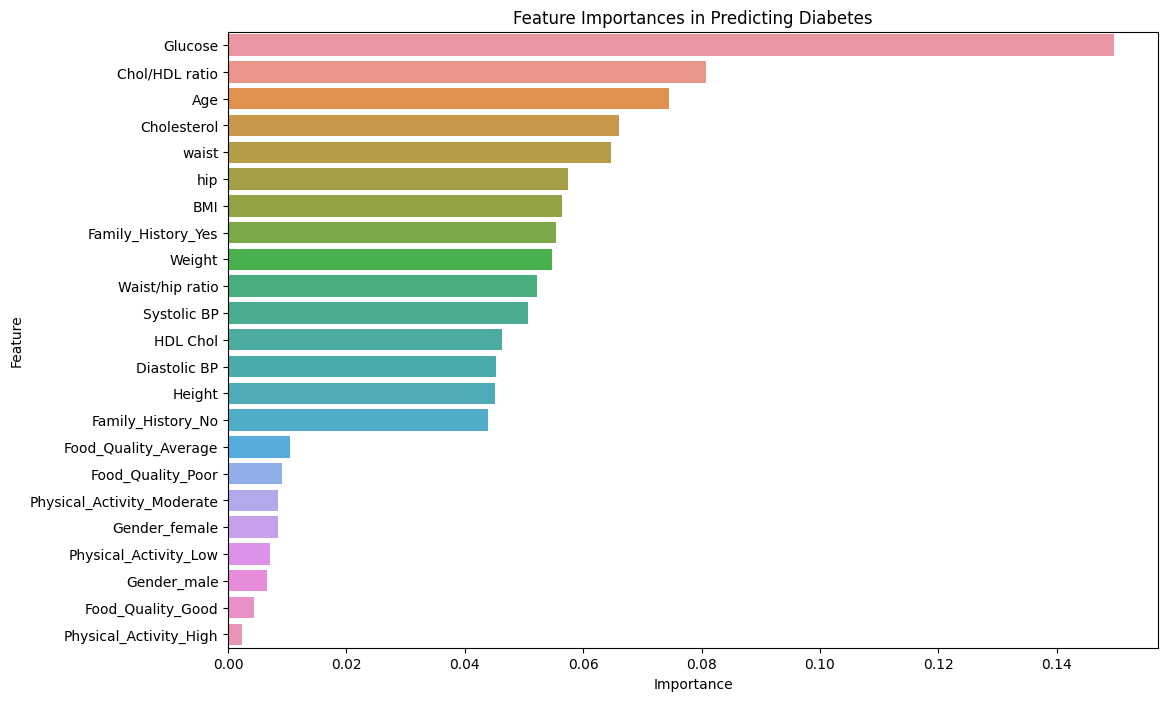

In [20]:
# Plotting all feature importances for a comprehensive view
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Predicting Diabetes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Dictionary to hold the models
models = {
    'Logistic regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random forest': RandomForestClassifier(),
    'Decision tree': DecisionTreeClassifier(),
    'Bagging': BaggingClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'XGboost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True)
}

# Dictionary to hold the scores
scores = {model: {'Precision': None, 'Recall': None, 'F1 Score': None, 'Accuracy': None, 'AUC': None}
          for model in models.keys()}

# Training and evaluating models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate scores
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # Update the scores dictionary
    scores[model_name]['Precision'] = precision
    scores[model_name]['Recall'] = recall
    scores[model_name]['F1 Score'] = f1
    scores[model_name]['Accuracy'] = accuracy
    scores[model_name]['AUC'] = auc

# For the Voting classifier, we'll use soft voting because it allows us to call predict_proba
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
voting_clf.fit(X_train, y_train)

# Make predictions with the voting classifier
y_pred_voting = voting_clf.predict(X_test)
y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]

# Calculate scores for the voting classifier
scores['Voting'] = {
    'Precision': precision_score(y_test, y_pred_voting),
    'Recall': recall_score(y_test, y_pred_voting),
    'F1 Score': f1_score(y_test, y_pred_voting),
    'Accuracy': accuracy_score(y_test, y_pred_voting),
    'AUC': roc_auc_score(y_test, y_prob_voting)
}

# Convert scores to a DataFrame for display
scores_df = pd.DataFrame(scores).T
scores_df['Accuracy'] = (scores_df['Accuracy'] * 100).round(0).astype(str) + '%'  # Format accuracy as a percentage
scores_df


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Precision,Recall,F1 Score,Accuracy,AUC
Logistic regression,0.764706,0.433333,0.553191,90.0%,0.865524
KNN,0.615385,0.266667,0.372093,87.0%,0.761429
Random forest,0.923077,0.400000,0.558140,91.0%,0.864667
Decision tree,0.566667,0.566667,0.566667,87.0%,0.746190
Bagging,0.500000,0.333333,0.400000,85.0%,0.847333
Adaboost,0.666667,0.533333,0.592593,89.0%,0.831619
XGboost,0.571429,0.400000,0.470588,87.0%,0.842286
SVM,1.000000,0.066667,0.125000,86.0%,0.819238
Voting,0.705882,0.400000,0.510638,89.0%,0.867429


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Preparing the target and features with the recoded 'Diabetes' column
target = 'Diabetes_recode'
features = final_data_modified.drop(columns=['Patient number', 'Diabetes', target])

# Encoding categorical features
categorical_features = features.select_dtypes(include=['object']).columns
features = pd.get_dummies(features, columns=categorical_features)

# Initializing SMOTE
smote = SMOTE(random_state=0)

# Applying SMOTE to balance the dataset
X_smote, y_smote = smote.fit_resample(features, final_data_modified[target])

# Splitting the dataset into training and testing sets after SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

# Re-training the models on the balanced dataset
scores_smote = {model: {'Precision': None, 'Recall': None, 'F1 Score': None, 'Accuracy': None, 'AUC': None}
          for model in models.keys()}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    
    # Make predictions
    y_pred_smote = model.predict(X_test_smote)
    y_prob_smote = model.predict_proba(X_test_smote)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred_smote)
    
    # Calculate scores
    precision_smote = precision_score(y_test_smote, y_pred_smote)
    recall_smote = recall_score(y_test_smote, y_pred_smote)
    f1_smote = f1_score(y_test_smote, y_pred_smote)
    accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
    auc_smote = roc_auc_score(y_test_smote, y_prob_smote) if hasattr(model, "predict_proba") else 0
    
    # Update the scores dictionary
    scores_smote[model_name]['Precision'] = precision_smote
    scores_smote[model_name]['Recall'] = recall_smote
    scores_smote[model_name]['F1 Score'] = f1_smote
    scores_smote[model_name]['Accuracy'] = accuracy_smote
    scores_smote[model_name]['AUC'] = auc_smote

# Voting classifier with soft voting, retrained on SMOTE data
voting_clf_smote = VotingClassifier(estimators=[(name, model) for name, model in models.items() if hasattr(model, "predict_proba")], voting='soft')
voting_clf_smote.fit(X_train_smote, y_train_smote)

# Make predictions with the voting classifier
y_pred_voting_smote = voting_clf_smote.predict(X_test_smote)
y_prob_voting_smote = voting_clf_smote.predict_proba(X_test_smote)[:, 1]

# Calculate scores for the voting classifier
scores_smote['Voting'] = {
    'Precision': precision_score(y_test_smote, y_pred_voting_smote),
    'Recall': recall_score(y_test_smote, y_pred_voting_smote),
    'F1 Score': f1_score(y_test_smote, y_pred_voting_smote),
    'Accuracy': accuracy_score(y_test_smote, y_pred_voting_smote),
    'AUC': roc_auc_score(y_test_smote, y_prob_voting_smote)
}

# Convert scores to a DataFrame for display
scores_smote_df = pd.DataFrame(scores_smote).T
scores_smote_df['Accuracy'] = (scores_smote_df['Accuracy'] * 100).round(0).astype(str) + '%'  # Format accuracy as a percentage

scores_smote_df



,Precision,Recall,F1 Score,Accuracy,AUC
Logistic regression,0.859375,0.896739,0.877660,87.0%,0.956358
KNN,0.769912,0.945652,0.848780,82.0%,0.907674
Random forest,0.902564,0.956522,0.928760,92.0%,0.978277
Decision tree,0.829268,0.923913,0.874036,86.0%,0.856535
Bagging,0.904255,0.923913,0.913978,91.0%,0.969094
Adaboost,0.872449,0.929348,0.900000,89.0%,0.937140
XGboost,0.910526,0.940217,0.925134,92.0%,0.974037
SVM,0.742857,0.565217,0.641975,67.0%,0.751211
Voting,0.897959,0.956522,0.926316,92.0%,0.976329


In [24]:
from imblearn.over_sampling import ADASYN

# Applying ADASYN to balance the dataset
adasyn = ADASYN(random_state=0)
X_adasyn, y_adasyn = adasyn.fit_resample(features, final_data_modified[target])

# Splitting the dataset into training and testing sets after ADASYN
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    X_adasyn, y_adasyn, test_size=0.3, random_state=0)

# Re-training the models on the balanced dataset
scores_adasyn = {model: {'Precision': None, 'Recall': None, 'F1 Score': None, 'Accuracy': None, 'AUC': None}
          for model in models.keys()}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_adasyn, y_train_adasyn)
    
    # Make predictions
    y_pred_adasyn = model.predict(X_test_adasyn)
    y_prob_adasyn = model.predict_proba(X_test_adasyn)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred_adasyn)
    
    # Calculate scores
    precision_adasyn = precision_score(y_test_adasyn, y_pred_adasyn)
    recall_adasyn = recall_score(y_test_adasyn, y_pred_adasyn)
    f1_adasyn = f1_score(y_test_adasyn, y_pred_adasyn)
    accuracy_adasyn = accuracy_score(y_test_adasyn, y_pred_adasyn)
    auc_adasyn = roc_auc_score(y_test_adasyn, y_prob_adasyn) if hasattr(model, "predict_proba") else 0
    
    # Update the scores dictionary
    scores_adasyn[model_name]['Precision'] = precision_adasyn
    scores_adasyn[model_name]['Recall'] = recall_adasyn
    scores_adasyn[model_name]['F1 Score'] = f1_adasyn
    scores_adasyn[model_name]['Accuracy'] = accuracy_adasyn
    scores_adasyn[model_name]['AUC'] = auc_adasyn

# Voting classifier with soft voting, retrained on ADASYN data
voting_clf_adasyn = VotingClassifier(estimators=[(name, model) for name, model in models.items() if hasattr(model, "predict_proba")], voting='soft')
voting_clf_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Make predictions with the voting classifier
y_pred_voting_adasyn = voting_clf_adasyn.predict(X_test_adasyn)
y_prob_voting_adasyn = voting_clf_adasyn.predict_proba(X_test_adasyn)[:, 1]

# Calculate scores for the voting classifier
scores_adasyn['Voting'] = {
    'Precision': precision_score(y_test_adasyn, y_pred_voting_adasyn),
    'Recall': recall_score(y_test_adasyn, y_pred_voting_adasyn),
    'F1 Score': f1_score(y_test_adasyn, y_pred_voting_adasyn),
    'Accuracy': accuracy_score(y_test_adasyn, y_pred_voting_adasyn),
    'AUC': roc_auc_score(y_test_adasyn, y_prob_voting_adasyn)
}

# Convert scores to a DataFrame for display
scores_adasyn_df = pd.DataFrame(scores_adasyn).T
scores_adasyn_df['Accuracy'] = (scores_adasyn_df['Accuracy'] * 100).round(0).astype(str) + '%'  # Format accuracy as a percentage

scores_adasyn_df



,Precision,Recall,F1 Score,Accuracy,AUC
Logistic regression,0.867725,0.872340,0.870027,86.0%,0.941842
KNN,0.745902,0.968085,0.842593,81.0%,0.890012
Random forest,0.900000,0.957447,0.927835,92.0%,0.979396
Decision tree,0.862745,0.936170,0.897959,89.0%,0.883748
Bagging,0.909091,0.904255,0.906667,90.0%,0.955893
Adaboost,0.889503,0.856383,0.872629,87.0%,0.936555
XGboost,0.917098,0.941489,0.929134,92.0%,0.968149
SVM,0.678322,0.515957,0.586103,61.0%,0.706469
Voting,0.899497,0.952128,0.925065,92.0%,0.971674


In [25]:
from docx import Document

# Creating a new Word document
doc = Document()

# Adding a title to the document
doc.add_heading('Classifier Performance', level=1)

# Adding the table to the document
table = doc.add_table(rows=10, cols=6)
table.style = 'Table Grid'

# Header row
headers = ["Classifier", "Precision", "Recall", "F1 Score", "Accuracy", "AUC"]
for i, header in enumerate(headers):
    table.cell(0, i).text = header

# Data rows
data = [
    ["Logistic regression", "0.859", "0.897", "0.878", "87.0%", "0.956"],
    ["KNN", "0.770", "0.946", "0.849", "82.0%", "0.908"],
    ["Random forest", "0.903", "0.957", "0.929", "92.0%", "0.978"],
    ["Decision tree", "0.829", "0.924", "0.874", "86.0%", "0.857"],
    ["Bagging", "0.904", "0.924", "0.914", "91.0%", "0.969"],
    ["Adaboost", "0.872", "0.929", "0.900", "89.0%", "0.937"],
    ["XGboost", "0.911", "0.940", "0.925", "92.0%", "0.974"],
    ["SVM", "0.743", "0.565", "0.642", "67.0%", "0.751"],
    ["Voting", "0.898", "0.957", "0.926", "92.0%", "0.976"]
]

# Populating the table with data
for row_num, row_data in enumerate(data, start=1):
    for col_num, col_data in enumerate(row_data):
        table.cell(row_num, col_num).text = col_data

# Saving the document
doc_path = 'Classifier_Performance.docx'
doc.save(doc_path)

doc_path



'Classifier_Performance.docx'

In [27]:
from docx import Document

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Classifier Performance', level=1)

# Add the table to the document
table = doc.add_table(rows=10, cols=6)
table.style = 'Table Grid'

# Header row
headers = ["Classifier", "Precision", "Recall", "F1 Score", "Accuracy", "AUC"]
for i, header in enumerate(headers):
    table.cell(0, i).text = header

# Data rows
data = [
    ["Logistic regression", "0.867725", "0.872340", "0.870027", "86.0%", "0.941842"],
    ["KNN", "0.745902", "0.968085", "0.842593", "81.0%", "0.890012"],
    ["Random forest", "0.900000", "0.957447", "0.927835", "92.0%", "0.979396"],
    ["Decision tree", "0.862745", "0.936170", "0.897959", "89.0%", "0.883748"],
    ["Bagging", "0.909091", "0.904255", "0.906667", "90.0%", "0.955893"],
    ["Adaboost", "0.889503", "0.856383", "0.872629", "87.0%", "0.936555"],
    ["XGboost", "0.917098", "0.941489", "0.929134", "92.0%", "0.968149"],
    ["SVM", "0.678322", "0.515957", "0.586103", "61.0%", "0.706469"],
    ["Voting", "0.899497", "0.952128", "0.925065", "92.0%", "0.971674"]
]

# Populate the table with data
for row_num, row_data in enumerate(data, start=1):
    for col_num, col_data in enumerate(row_data):
        table.cell(row_num, col_num).text = col_data

# Save the document
doc.save('Classifier_Performance.docx')


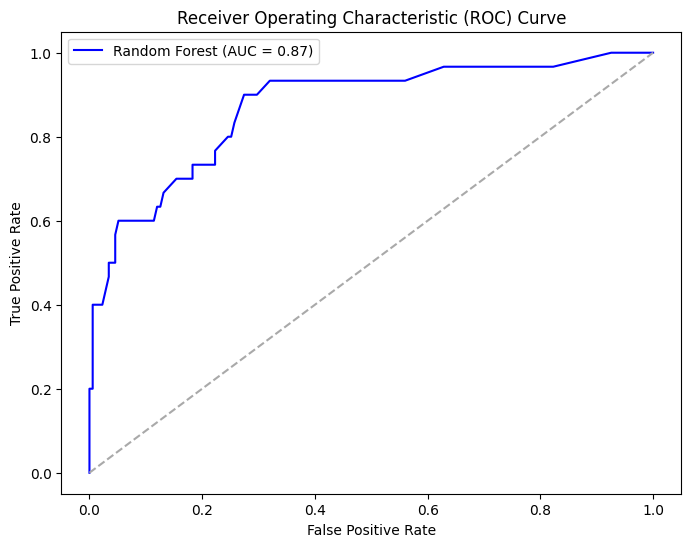

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict probabilities
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


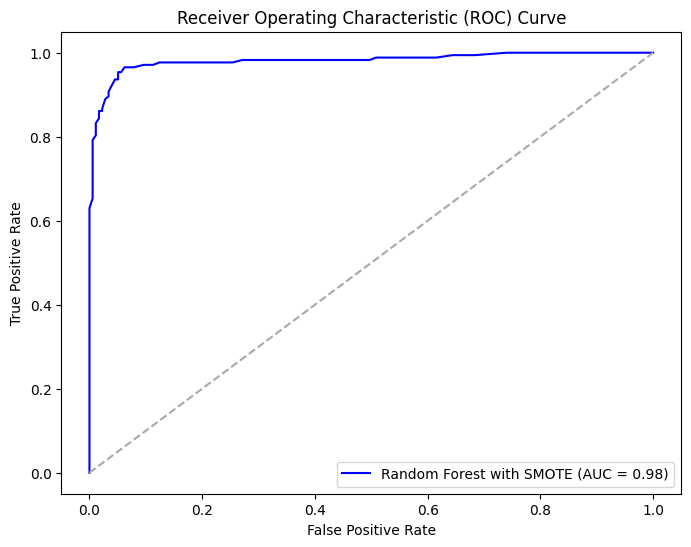

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(features, final_data_modified[target])

# Split the dataset into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=121)

# Train the Random Forest Classifier
rf_classifier_smote = RandomForestClassifier()
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict probabilities
y_prob_rf_smote = rf_classifier_smote.predict_proba(X_test_smote)[:, 1]

# Calculate ROC curve and AUC
fpr_rf_smote, tpr_rf_smote, thresholds_rf_smote = roc_curve(y_test_smote, y_prob_rf_smote)
auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_smote, tpr_rf_smote, color='blue', label=f'Random Forest with SMOTE (AUC = {auc_rf_smote:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [54]:
from lime import lime_tabular
import numpy as np

# Assuming `rf_classifier_smote` is your trained Random Forest model
# and `X_test_smote` is your test set

# Initialize the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_smote),
    feature_names=features.columns,
    class_names=['Not Diabetes', 'Diabetes'],
    mode='classification'
)

# Choose a specific instance to explain
instance_index = 1  # This should be the index of the instance you want to explain
instance = X_test_smote[instance_index]

# Generate explanations
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=rf_classifier_smote.predict_proba
)

# Show the explanation
explanation.show_in_notebook(show_table=True, show_all=False)


KeyError: 1

In [62]:
# Check the length of X_test_smote to ensure the index is within range
print(len(X_test_smote))

# If using pandas DataFrame and want to use the iloc indexer:
instance = X_test_smote.iloc[14,]

# If X_test_smote is a numpy array:#
#instance = X_test_smote[14]
print(instance)

350
Cholesterol                   176.258694
Glucose                        79.513970
HDL Chol                       57.415880
Chol/HDL ratio                  1.517588
Age                            33.562915
Height                         68.240603
Weight                        184.704824
BMI                            24.349548
Systolic BP                   170.363216
Diastolic BP                   95.928041
waist                          34.621407
hip                            38.012161
Waist/hip ratio                 0.873930
Gender_female                   0.000000
Gender_male                     0.000000
Physical_Activity_High          0.000000
Physical_Activity_Low           0.000000
Physical_Activity_Moderate      1.000000
Food_Quality_Average            0.000000
Food_Quality_Good               0.000000
Food_Quality_Poor               0.000000
Family_History_No               0.000000
Family_History_Yes              1.000000
Name: 977, dtype: float64


In [73]:
from lime import lime_tabular
instance_index = 300
# Make sure the index is within the bounds of X_test_smote
if instance_index < len(X_test_smote):
    # Initialize the LIME explainer
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train_smote),
        feature_names=features.columns,
        class_names=['Not Diabetes', 'Diabetes'],
        mode='classification'
    )

    # Choose a specific instance to explain
    instance = X_test_smote.iloc[instance_index] if isinstance(X_test_smote, pd.DataFrame) else X_test_smote[instance_index]

    # Generate explanations
    explanation = explainer.explain_instance(
        data_row=instance,
        predict_fn=rf_classifier_smote.predict_proba
    )

    # Show the explanation in your Jupyter Notebook
    explanation.show_in_notebook(show_table=True, show_all=False)
else:
    print(f"Index {instance_index} is out of bounds for the dataset.")
